In [ ]:
#Proyecto en python para analizar la información demográfica del censo de 1994 en EEUUAA

# ¿Cuántas personas de cada raza están representadas en este conjunto de datos?
# ¿Cuál es la edad promedio de los hombres?
# ¿Cuál es el porcentaje de personas que tienen un título de Licenciatura?
# ¿Qué porcentaje de personas con educación avanzada (Licenciatura, Maestría o Doctorado) ganan más de 50K?
# ¿Qué porcentaje de personas sin educación avanzada ganan más de 50K?
# La raza afecta está relacionada a la riqueza?
# ¿Cuál es el número mínimo de horas que una persona trabaja por semana?
# ¿Qué porcentaje de las personas que trabajan el número mínimo de horas por semana tienen un salario de más de 50K?
# ¿Qué país tiene el mayor porcentaje de personas que ganan >50K y cuál es ese porcentaje?
# Identificar la ocupación más popular para aquellos que ganan >50K en India.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\PC\Downloads\adult.data.csv")

In [12]:
# ¿Cuántas personas de cada raza están representadas en este conjunto de datos?
race_count = df["race"].value_counts()
print("Personas por raza:\n", race_count) 

Personas por raza:
 race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


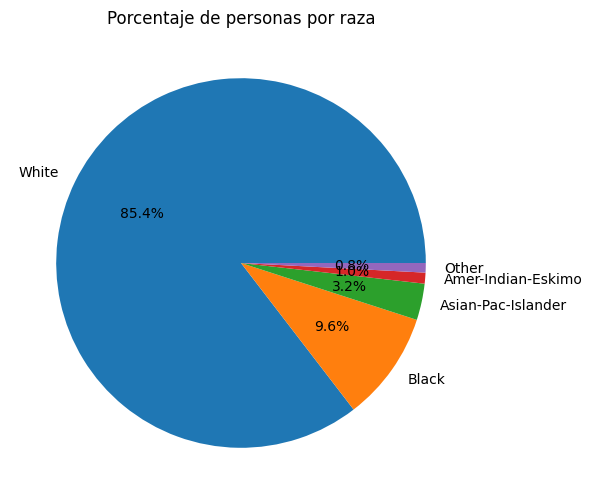

In [49]:
plt.figure(figsize=(10, 6))
plt.pie(race_count.values, labels=race_count.index, autopct='%1.1f%%')
plt.title("Porcentaje de personas por raza")
plt.show()

In [15]:
# ¿Cuál es la edad promedio de los hombres?
average_age_men = df.loc[df["sex"]=="Male","age"].mean().round(1)
print("Edad promedio de los hombres:", average_age_men)

Edad promedio de los hombres: 39.4


In [16]:
# ¿Cuál es el porcentaje de personas que tienen un título de Licenciatura?
percentage_bachelors =100*(df.loc[df["education"]=="Bachelors"].shape[0])/(df["education"].shape[0])
percentage_bachelors=round(percentage_bachelors,1)
print(f"Porcentaje de personas con un título de Licenciatura: {percentage_bachelors}%")

Porcentaje de personas con un título de Licenciatura: 16.4%


In [19]:
# ¿Qué porcentaje de personas con educación avanzada (Licenciatura, Maestría o Doctorado) ganan más de 50K?
higher_education = df.loc[(df["education"]=="Bachelors")|(df["education"]=="Masters")|(df["education"]=="Doctorate")]
higher_education_rich = 100*(higher_education.loc[higher_education["salary"]==">50K"].shape[0])/(higher_education.shape[0])
higher_education_rich=round(higher_education_rich,1)

print(f"Porcentaje de personas con educación superior que ganan >50K: {higher_education_rich}%")

Porcentaje de personas con educación superior que ganan >50K: 46.5%


In [20]:
# ¿Qué porcentaje de personas sin educación avanzada ganan más de 50K?
lower_education = df.loc[(df["education"]!="Bachelors")&(df["education"]!="Masters")&(df["education"]!="Doctorate")]
lower_education_rich = 100*(lower_education.loc[lower_education["salary"]==">50K"].shape[0])/(lower_education.shape[0])
lower_education_rich=round(lower_education_rich,1)

print(f"Porcentaje de personas sin educación superior que ganan >50K: {lower_education_rich}%")

Porcentaje de personas sin educación superior que ganan >50K: 17.4%


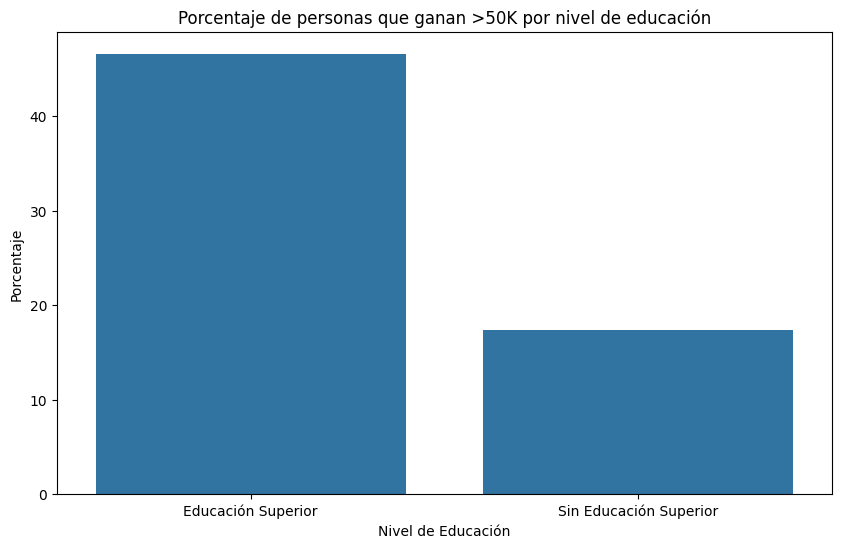

In [37]:
data = {
    "Nivel de Educación": ["Educación Superior", "Sin Educación Superior"],
    "Porcentaje de personas que ganan >50K": [higher_education_rich, lower_education_rich]
}

df_porcentajes = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x="Nivel de Educación", y="Porcentaje de personas que ganan >50K", data=df_porcentajes)
plt.title("Porcentaje de personas que ganan >50K por nivel de educación")
plt.xlabel("Nivel de Educación")
plt.ylabel("Porcentaje")
plt.show()

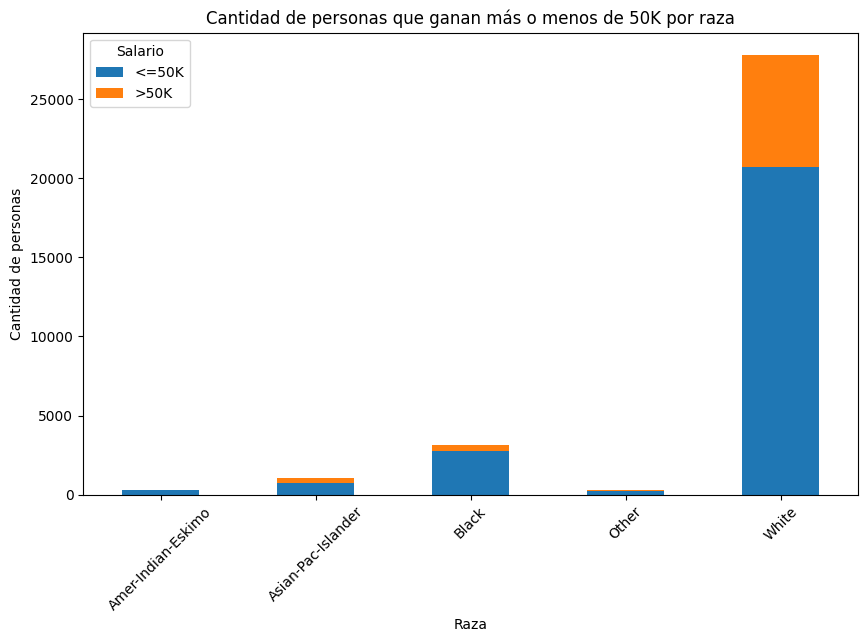

In [47]:
#La raza afecta está relacionada a la riqueza?
data = df.groupby(["race", "salary"]).size().unstack()
data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Cantidad de personas que ganan más o menos de 50K por raza")
plt.xlabel("Raza")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=45)
plt.legend(title="Salario", labels=["<=50K", ">50K"])
plt.show()

In [24]:
# ¿Cuál es el número mínimo de horas que una persona trabaja por semana?
min_work_hours = df["hours-per-week"].min()
print(f"Tiempo de trabajo mínimo: {min_work_hours} horas/semana")

Tiempo de trabajo mínimo: 1 horas/semana


In [26]:
# ¿Qué porcentaje de las personas que trabajan el número mínimo de horas por semana tienen un salario de más de 50K?
num_min_workers = df[df["hours-per-week"]==df["hours-per-week"].min()]
rich_percentage = 100*(num_min_workers.loc[num_min_workers["salary"]==">50K"].shape[0])/(num_min_workers.shape[0])
rich_percentage=round(rich_percentage,1)
print(f"Porcentaje de personas que ganan más de 50K y trabajan el mínimo: {rich_percentage}%")

Porcentaje de personas que ganan más de 50K y trabajan el mínimo: 10.0%


In [28]:
# ¿Qué país tiene el mayor porcentaje de personas que ganan >50K y cuál es ese porcentaje?
highest_earning_country = df[df["salary"] == ">50K"]["native-country"].value_counts().idxmax()
highest_earning_country2=df[df["native-country"] == df[df["salary"] == ">50K"]["native-country"].value_counts().idxmax()]
highest_earning_country_percentage = 100*(highest_earning_country2[highest_earning_country2["salary"]==">50K"].shape[0])/(highest_earning_country2.shape[0])
highest_earning_country_percentage=round(highest_earning_country_percentage,1)
print("País con mayor porcentaje de personas ricas:", highest_earning_country)
print(f"Porcentaje de personas ricas en ese país: {highest_earning_country_percentage}%")

País con mayor porcentaje de personas ricas: United-States
Porcentaje de personas ricas en ese país: 24.6%


In [30]:
# Identificar la ocupación más popular para aquellos que ganan >50K en India.
top_IN_occupation = df[(df["salary"]==">50K")&(df["native-country"]=="India")].value_counts("occupation").idxmax()

print("Ocupación más popular de personas que ganan >50K en India:", top_IN_occupation)

Ocupación más popular de personas que ganan >50K en India: Prof-specialty
